In [3]:
from gensim.models import Word2Vec
import pyLDAvis
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
gensim.__version__

'3.8.1'

In [4]:
pyLDAvis.__version__

'2.1.2'

# Data

In [40]:
sentences =[]

for i in range(100000):
    start = np.random.randint(0,20)
    finish = start + np.random.randint(1,10)
    sentence = [ str(x) for x in range(start,finish)]
    
    sentences.append(sentence)


In [5]:
np.random.randint(0,10)

4

In [7]:
sentences

[['1', '2', '3'],
 ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'],
 ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'],
 ['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18'],
 ['5', '6', '7', '8', '9', '10', '11'],
 ['3', '4', '5', '6', '7', '8', '9'],
 ['4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21'],
 ['9', '10', '11', '12', '13', '14'],
 ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
 ['5', '6', '7', '8', '9', '10'],
 ['6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20'],
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
 ['9', '10', '11', '12', '13', '14', '15', '16', '17'],
 ['0', '1', '2', '3', '4', '5', '6'],
 ['7', '8',

In [9]:
model = Word2Vec(sentences,size=10,window=5,min_count=1)

In [11]:
model.wv["1"]

array([-1.913547 , -4.196005 , -1.9324342, -2.1051056,  0.5271561,
       -2.6618452, -4.5209727, -2.0314424, -0.222935 , -0.9506837],
      dtype=float32)

In [15]:
def plot_heatmap(model):
    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab],linewidths=0.5);

<IPython.core.display.Javascript object>


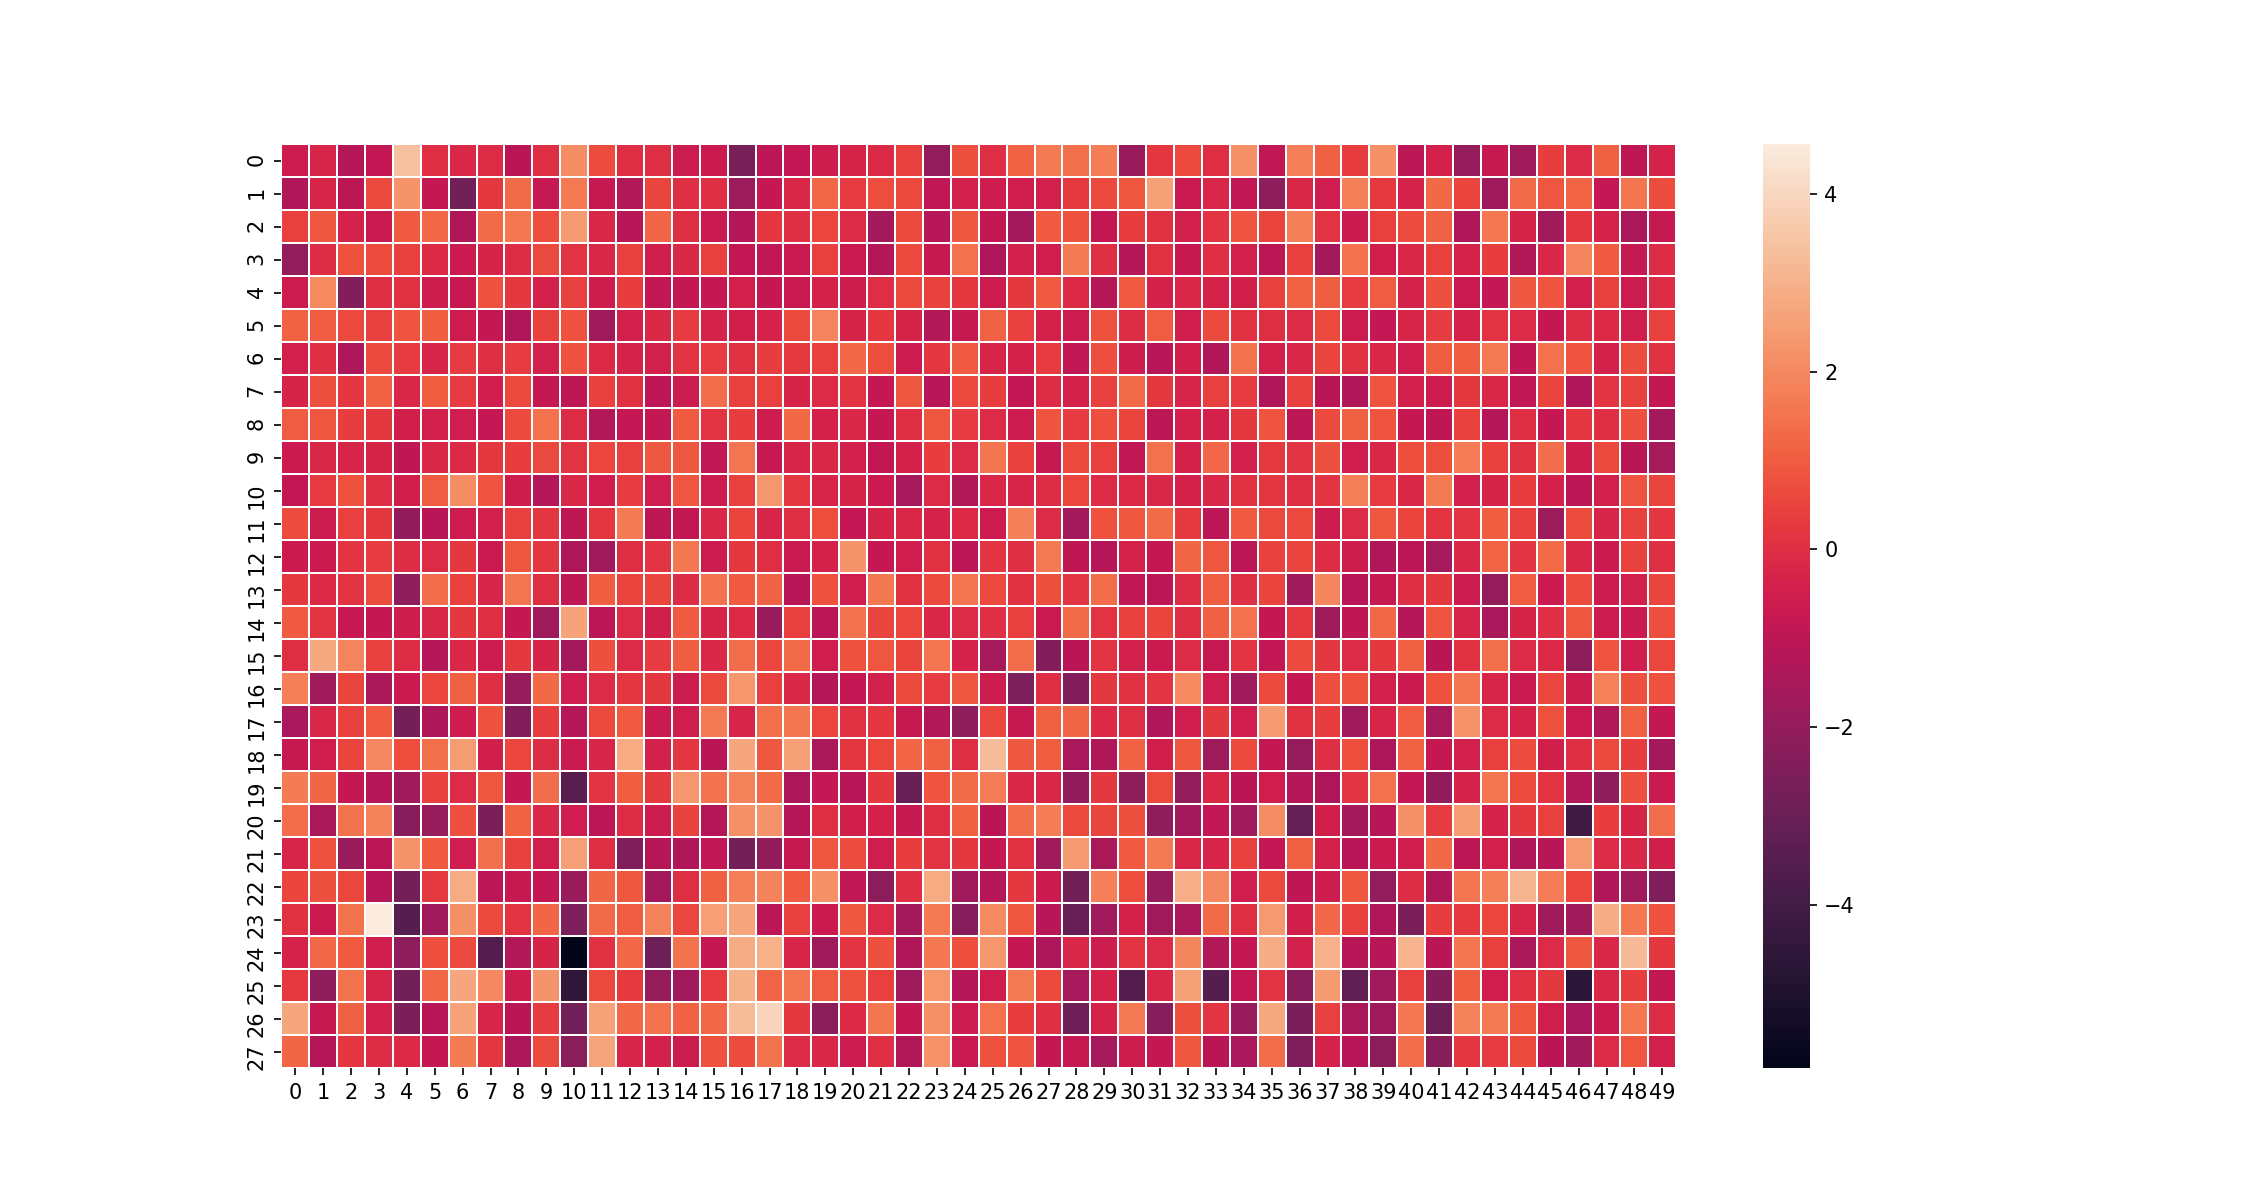

In [17]:
plot_heatmap(Word2Vec(sentences,size=50,window=5))

# PCA

In [27]:
X = model.wv[model.wv.vocab]
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

In [23]:
X.shape

(28, 10)

<IPython.core.display.Javascript object>


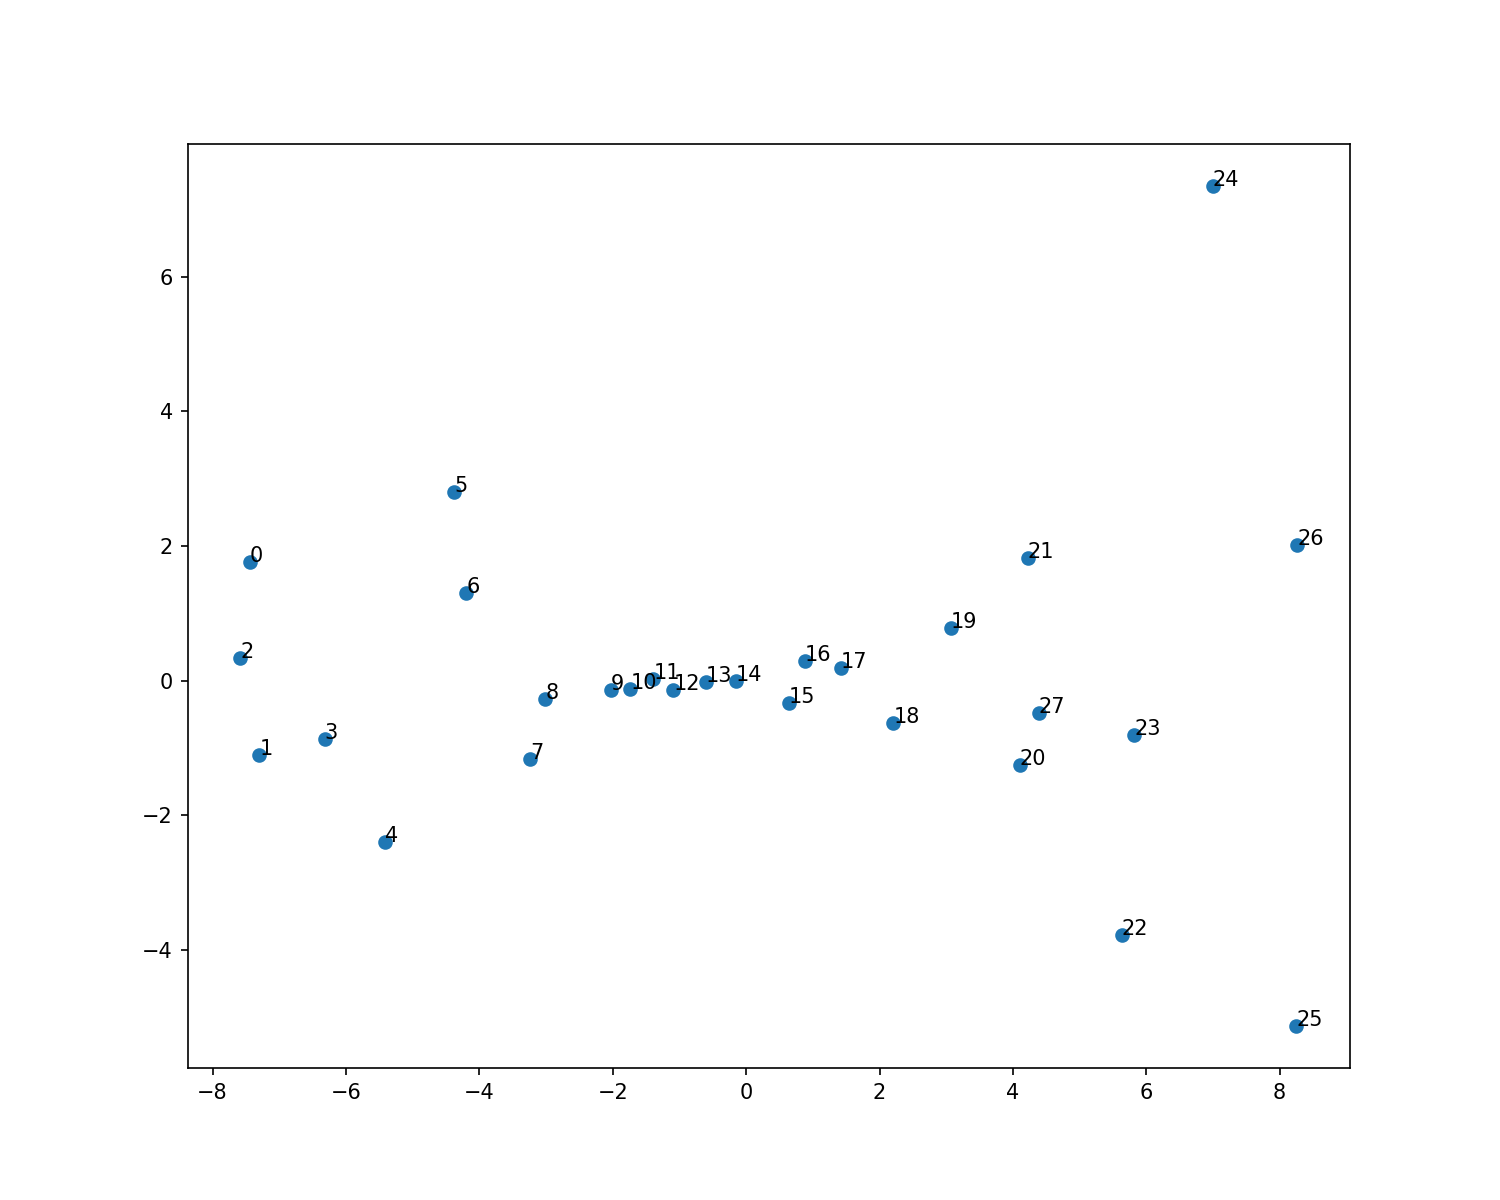

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(result[:,0],result[:,1]);

In [35]:
words = list(model.wv.vocab)
for i,word in enumerate(words):
    plt.annotate(word,xy=(result[i,0],result[i,1]))

In [36]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)
    
    plt.figure(figsize=(10,8))
    plt.scatter(result[:,0],result[:,1]);

    words = list(model.wv.vocab)
    for i,word in enumerate(words):
        plt.annotate(word,xy=(result[i,0],result[i,1]))

<IPython.core.display.Javascript object>


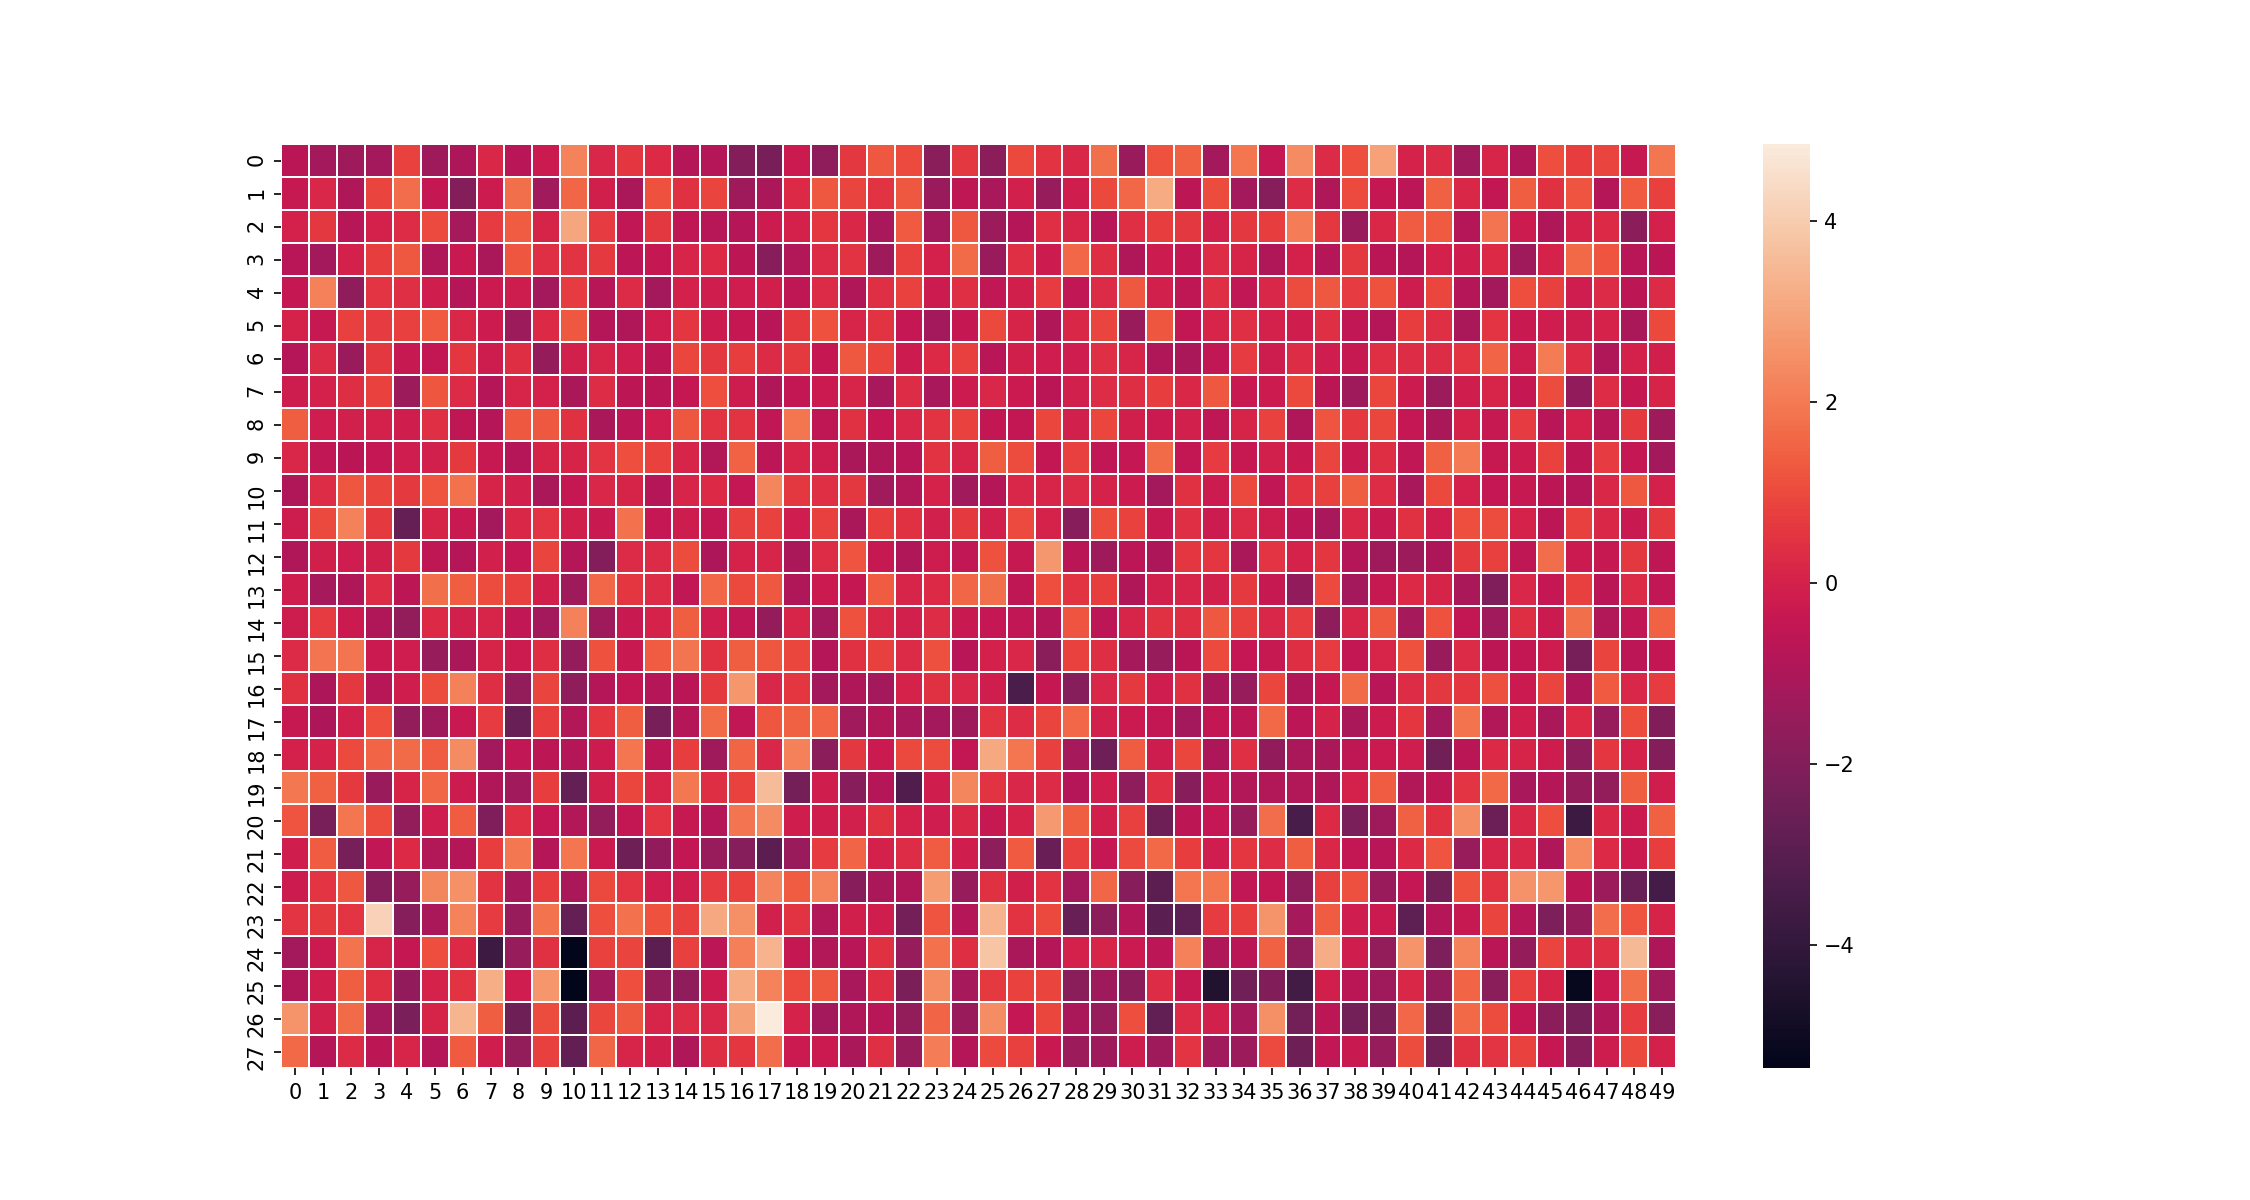

In [32]:
plot_heatmap(Word2Vec(sentences,size=50,window=5))


In [39]:
model.wv.most_similar("1",topn=3)

[('3', 0.43931782245635986),
 ('4', 0.400326132774353),
 ('5', 0.39811697602272034)]

<IPython.core.display.Javascript object>


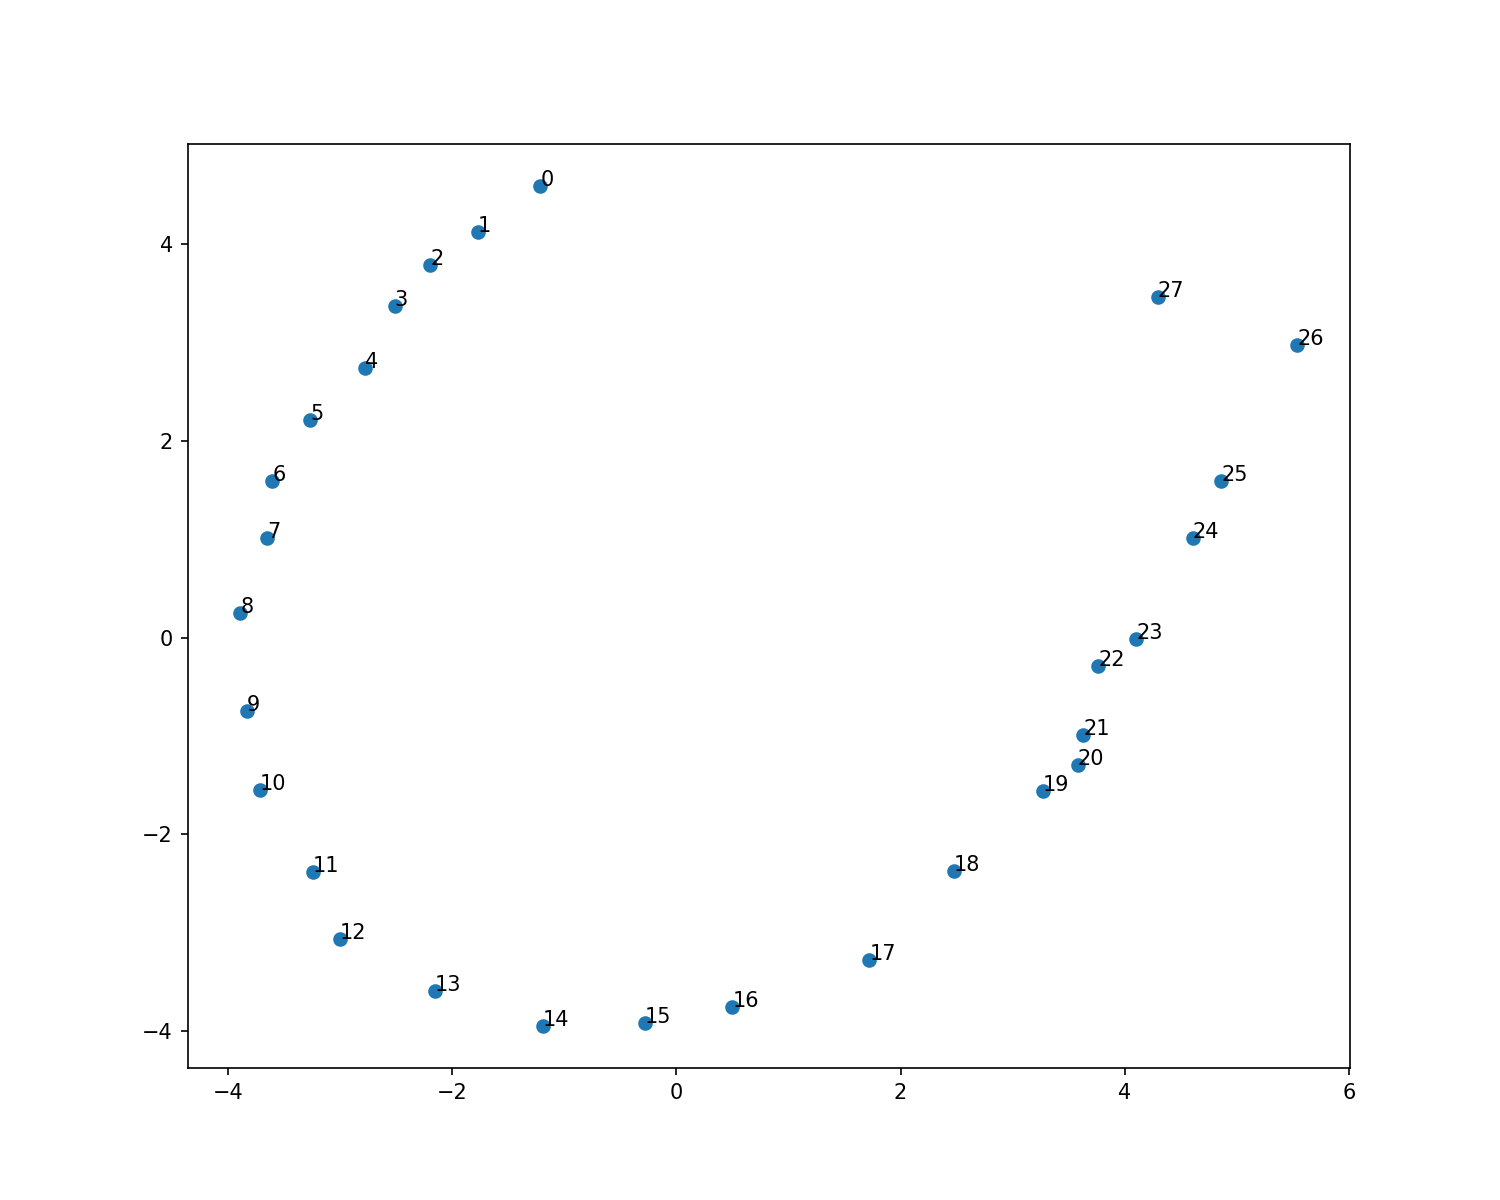

In [41]:
plot_pca(Word2Vec(sentences,size=300,window=5))

In [43]:
model.wv.most_similar(positive=["10","8"],topn=3,negative=["6"])

[('23', 0.6830630898475647),
 ('12', 0.5853644609451294),
 ('19', 0.44971320033073425)]